In [87]:
import importlib
import pandas as pd
import analysis_functions as af
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from scipy import stats
from scipy.io import loadmat
from scipy.ndimage import uniform_filter1d
import os
import pickle
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [204]:
# Load the ctl data
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl = pickle.load(f)

# Load the tst data 
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_tstdata.pkl")
with open(desktop_path, 'rb') as f:
    data_tst = pickle.load(f)
    data_tst.pop(13)

reward_trigger_ctl_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_ctl.mat")
for ani in data_ctl:
    del data_ctl[ani]['reward_indices']
    data_ctl[ani]['reward_indices'] = np.squeeze(reward_trigger_ctl_ds['downsampled_rewardtrigger_ctl'][0][ani])

reward_trigger_tst_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_tst.mat")
for ani in data_tst:
    del data_tst[ani]['reward_indices']
    data_tst[ani]['reward_indices'] = np.squeeze(reward_trigger_tst_ds['downsampled_rewardtrigger_tst'][0][ani])

In [205]:
# Normalise Pupil data by trials
for ani in data_ctl:
    pupil_signal = data_ctl[ani]['pupil']
    trial_start_indices = data_ctl[ani]['trial_start_indices']
    for trial in range(len(trial_start_indices)-1):
        start = trial_start_indices[trial]
        end = trial_start_indices[trial+1]
        segment = pupil_signal[start:end]
        segment = (segment-np.nanmedian(segment))/np.nanstd(segment)
        data_ctl[ani]['pupil'][start:end] = segment

for ani in data_tst:
    pupil_signal = data_tst[ani]['pupil']
    trial_start_indices = data_tst[ani]['trial_start_indices']
    for trial in range(len(trial_start_indices)-1):
        start = trial_start_indices[trial]
        end = trial_start_indices[trial+1]
        segment = pupil_signal[start:end]
        segment = (segment-np.nanmedian(segment))/np.nanstd(segment)
        data_tst[ani]['pupil'][start:end] = segment

In [206]:
ctl_animals = [0,4,7,8]
tst_animals = [1,5,8,9,10]

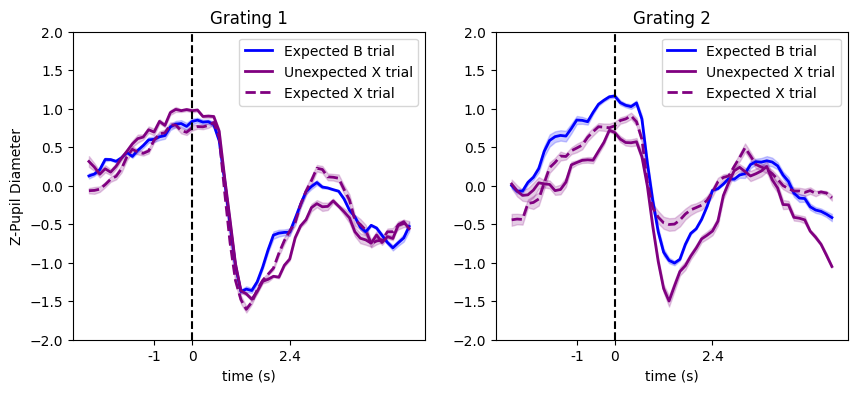

In [127]:
# Pupil Size Averaged (Ctl)

fig,axes = plt.subplots(1,2,figsize=(10,4))
unexp_grat = {}
exp_grat = {}
for ani in data_ctl:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data_ctl[ani]['grating_indices']['gr_1'][trial])
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data_ctl[ani]['grating_indices']['gr_1'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][exp_grat[ani][6:12]] for ani in ctl_animals]), axis = 1),color='blue', alpha=0.2,  label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_grat[ani][:6]] for ani in ctl_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_grat[ani][6:12]] for ani in ctl_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial', style = 'dash')
axes[0].set_title('Grating 1')
axes[0].axvline(x=19, color='k', linestyle='--')
axes[0].set_ylabel('Z-Pupil Diameter')
plt.setp(axes,ylim=[-2,2], xticks=[12,19,37], xticklabels=['-1','0','2.4'],xlabel='time (s)')
axes[0].legend()

unexp_grat = {}
exp_grat = {}
for ani in data_ctl:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data_ctl[ani]['grating_indices']['gr_2'][trial])
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data_ctl[ani]['grating_indices']['gr_2'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][exp_grat[ani][6:12]] for ani in ctl_animals]), axis = 1),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_grat[ani][:6]] for ani in ctl_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_grat[ani][6:12]] for ani in ctl_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial', style = 'dash')
axes[1].set_title('Grating 2')
axes[1].axvline(x=19, color='k', linestyle='--')
axes[1].legend()

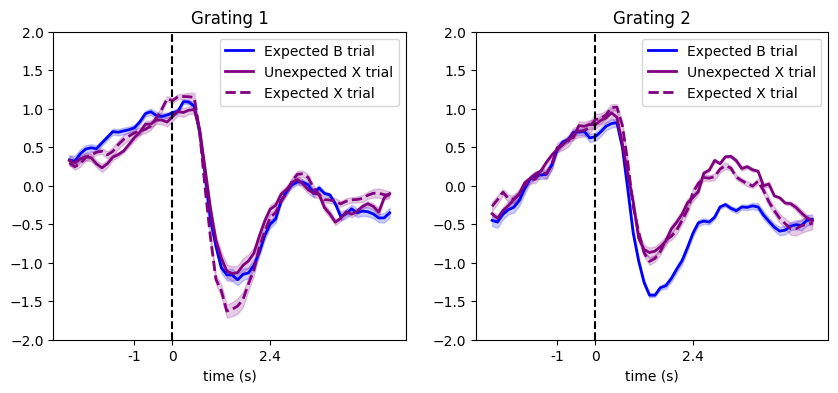

In [171]:
# Pupil Size Averaged (tst)

fig,axes = plt.subplots(1,2,figsize=(10,4))
unexp_grat = {}
exp_grat = {}
for ani in data_tst:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data_tst[ani]['grating_indices']['gr_1'][trial])
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data_tst[ani]['grating_indices']['gr_1'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][exp_grat[ani][6:12]] for ani in tst_animals]), axis = 1),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_grat[ani][:6]] for ani in tst_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_grat[ani][6:12]] for ani in tst_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial', style = 'dash')
axes[0].set_title('Grating 1')
axes[0].axvline(x=19, color='k', linestyle='--')
plt.setp(axes,ylim=[-2,2], xticks=[12,19,37], xticklabels=['-1','0','2.4'],xlabel='time (s)')
axes[0].legend()

unexp_grat = {}
exp_grat = {}
for ani in data_tst:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data_tst[ani]['grating_indices']['gr_2'][trial])
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data_tst[ani]['grating_indices']['gr_2'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][exp_grat[ani][6:12]] for ani in tst_animals]), axis = 1),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_grat[ani][:6]] for ani in tst_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_grat[ani][6:12]] for ani in tst_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial', style = 'dash')
axes[1].set_title('Grating 2')
axes[1].axvline(x=19, color='k', linestyle='--')
axes[1].legend()

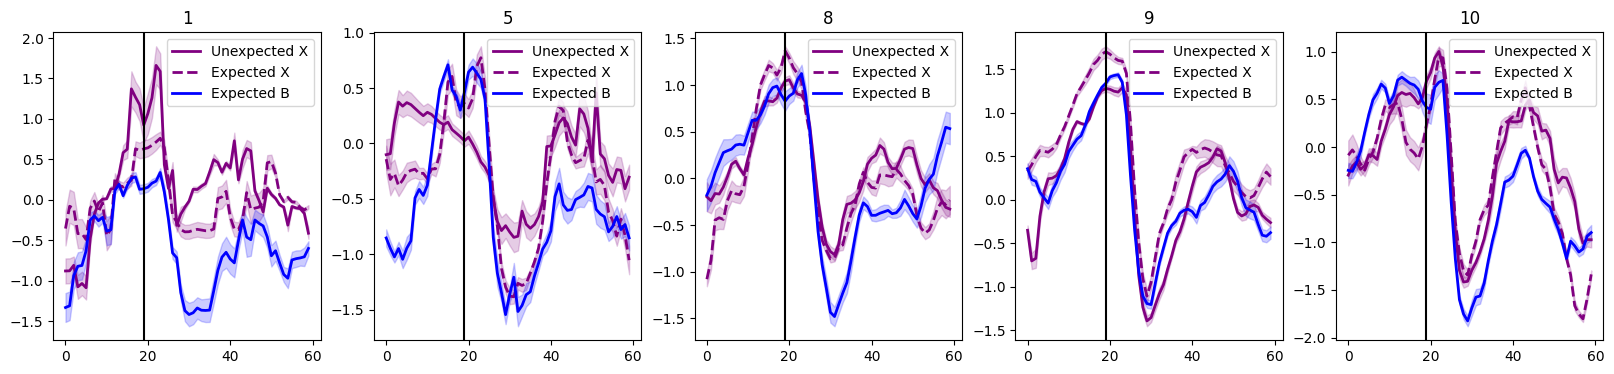

In [ ]:
# Validate: Pupil Size near gratings  for each animal
unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(data_tst[ani]['grating_indices']['gr_2'][trial]) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(data_tst[ani]['grating_indices']['gr_2'][trial-1])

fig, axes = plt.subplots(1, 5, figsize=(20, 4)) 
axes = axes.flatten()
t_frames = 60
for i, ani in enumerate(tst_animals):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][unexp_rw[ani][:6]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][unexp_rw[ani][6:12]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][exp_rw[ani][6:12]], color='blue', alpha=0.2, label= 'Expected B')
    ax.axvline([19], color='black')
    ax.set_title(f'{ani}')
    ax.legend()


In [72]:
# Check reward & grating position
for ani in data_ctl:
    print(ani)
    print(data_ctl[ani]['real_position'][data_ctl[ani]['reward_indices']])

for ani in data_tst:
    print(ani)
    print(data_tst[ani]['real_position'][data_tst[ani]['reward_indices']])

for ani in data_ctl:
    print(ani)
    print(data_ctl[ani]['real_position'][data_ctl[ani]['grating_indices']['gr_2']][:,19])

0
[4.61423784 4.6102872  4.61761095 4.61557216 4.61673717 4.62378462
 4.62501187 4.62733944 4.62999311 4.61546059 4.61102655 4.62415484
 4.63162367 4.61365208 4.61674782 4.62447916 4.6155124  4.61462305
 4.62614704 4.6182084  4.61580865 4.61444946 4.61396337 4.61814622
 4.62526827 4.62431488 4.61703193 4.62445676 4.61716286 4.61737195
 4.62556561 4.61095186 4.62655776 4.613279   4.63016351 4.62192383
 4.61502202 4.62445921 4.63551459 4.61456895 4.62724983 4.63136919
 4.61231106 4.62537537 4.62233891 4.62371492 4.62023727 4.62131112
 4.61899008 4.61823331 4.62612711 4.61819345 4.62050112 4.61704837
 4.62206197 4.62725481 4.61355076 4.61881087 4.62727283 4.61256997
 4.62407334 4.61208321 4.63530495 4.61618944 4.61814119 4.61507179
 4.62021236 4.61670234 4.62506158 4.62285854 4.61762984 4.63052175
 4.62614705 4.6137798  4.61364784 4.61783003 4.62929113 4.62937577
 4.62319216 4.61478365 4.6244667  4.630725   4.62288246 4.61407456
 4.63203874 4.61167627 4.62397876 4.61455635 4.61370513 4.61

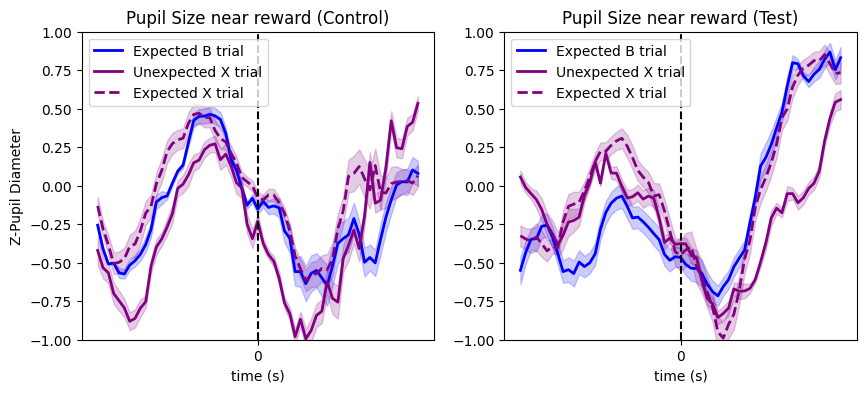

In [207]:
# Pupil Size Averaged (Ctl & Tst) 

fig,axes = plt.subplots(1,2,figsize=(10,4))

unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial-1]-30,data_ctl[ani]['reward_indices'][trial-1]+31))


t_frames = 61
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][exp_rw[ani][6:12]] for ani in ctl_animals]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_rw[ani][:6]] for ani in ctl_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_rw[ani][6:12]] for ani in ctl_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[0].set_title('Pupil Size near reward (Control)')
axes[0].axvline(x=30, color='k', linestyle='--')
axes[0].legend()

unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial-1]-30,data_tst[ani]['reward_indices'][trial-1]+31))
t_frames = 61
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][exp_rw[ani][6:12]] for ani in tst_animals]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_rw[ani][:6]] for ani in tst_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_rw[ani][6:12]] for ani in tst_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[1].set_title('Pupil Size near reward (Test)')
axes[1].axvline(x=30, color='k', linestyle='--')
axes[0].set_ylabel('Z-Pupil Diameter')
plt.setp(axes,ylim=[-1,1], xticks=[30], xticklabels=['0'],xlabel='time (s)')
axes[1].legend()

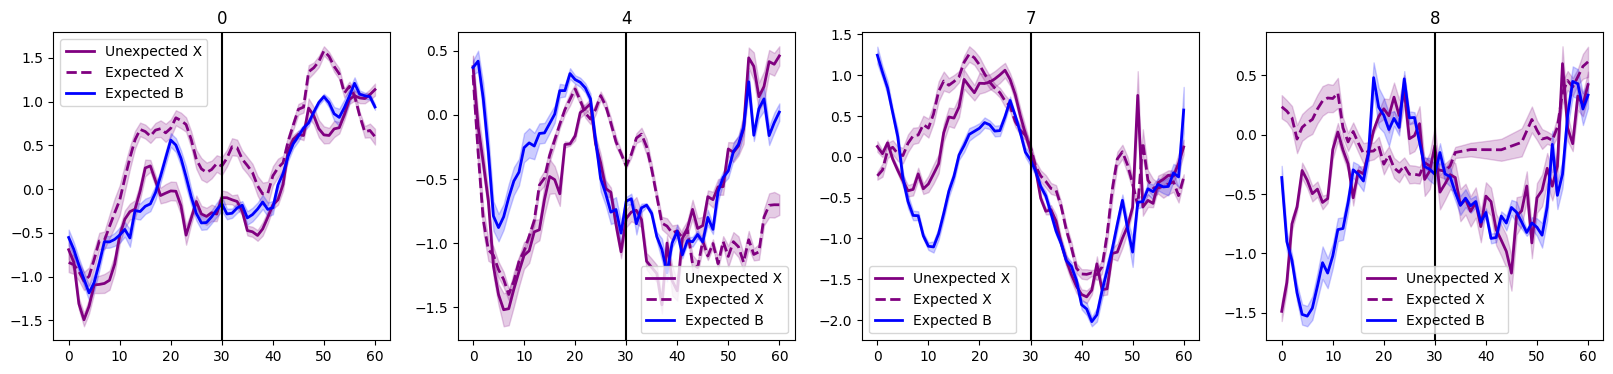

In [135]:
# Pupil Size near reward (Control)
unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial-1]-30,data_ctl[ani]['reward_indices'][trial-1]+31))

fig, axes = plt.subplots(1, 4, figsize=(20, 4)) 
axes = axes.flatten()
t_frames = 61
for i, ani in enumerate(ctl_animals):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][unexp_rw[ani][:6]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][unexp_rw[ani][6:12]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][exp_rw[ani][:6]], color='blue', alpha=0.2, label= 'Expected B')
    ax.axvline([30], color='black')
    ax.set_title(f'{ani}')
    ax.legend()


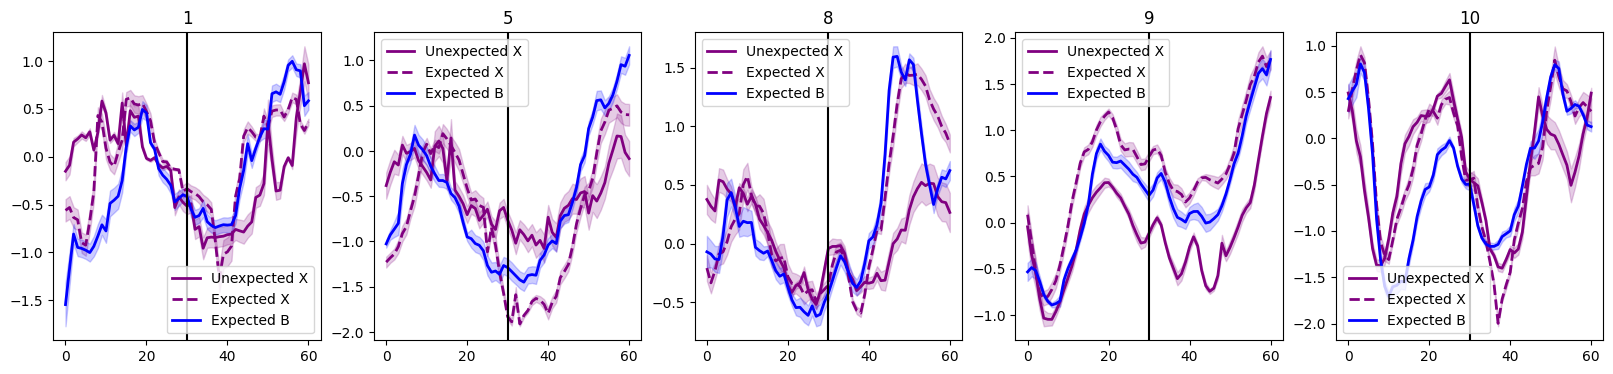

In [ ]:
# Pupil Size near reward (Test)
unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial-1]-30,data_tst[ani]['reward_indices'][trial-1]+31))

fig, axes = plt.subplots(1, 5, figsize=(20, 4)) 
axes = axes.flatten()
t_frames = 61
for i, ani in enumerate(tst_animals):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][unexp_rw[ani][:6]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][unexp_rw[ani][6:12]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), data_tst[ani]['pupil'][exp_rw[ani][6:12]], color='blue', alpha=0.2, label= 'Expected B')
    ax.axvline([30], color='black')
    ax.set_title(f'{ani}')
    ax.legend()

------------------

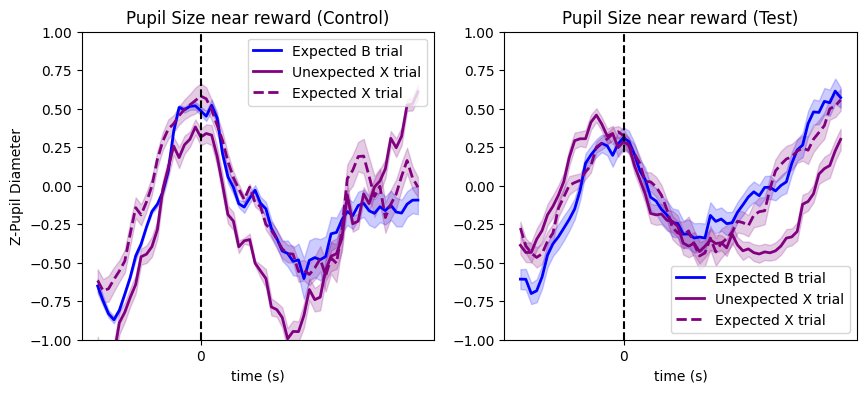

In [43]:
# Pupil Size Averaged (Ctl & Tst) 

fig,axes = plt.subplots(1,2,figsize=(10,4))
unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(data_ctl[ani]['reward_indices'][trial]) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(data_ctl[ani]['reward_indices'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][exp_rw[ani][6:12]] for ani in [0,4,7,8]]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_rw[ani][:6]] for ani in [0,4,7,8]]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['pupil'][unexp_rw[ani][6:12]] for ani in [0,4,7,8]]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[0].set_title('Pupil Size near reward (Control)')
# axes[0].set_xlim([10,40])
axes[0].axvline(x=19, color='k', linestyle='--')
axes[0].legend()

unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(data_tst[ani]['reward_indices'][trial]) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(data_tst[ani]['reward_indices'][trial-1])
t_frames = 60
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][exp_rw[ani][6:12]] for ani in [1,2,3,4,5,6,7,8,9,10,11,12]]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_rw[ani][:6]] for ani in [1,2,3,4,5,6,7,8,9,10,11,12]]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['pupil'][unexp_rw[ani][6:12]] for ani in [1,2,3,4,5,6,7,8,9,10,11,12]]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[1].set_title('Pupil Size near reward (Test)')
axes[1].axvline(x=19, color='k', linestyle='--')
axes[0].set_ylabel('Z-Pupil Diameter')
plt.setp(axes,ylim=[-1,1], xticks=[19], xticklabels=['0'],xlabel='time (s)')
axes[1].legend()

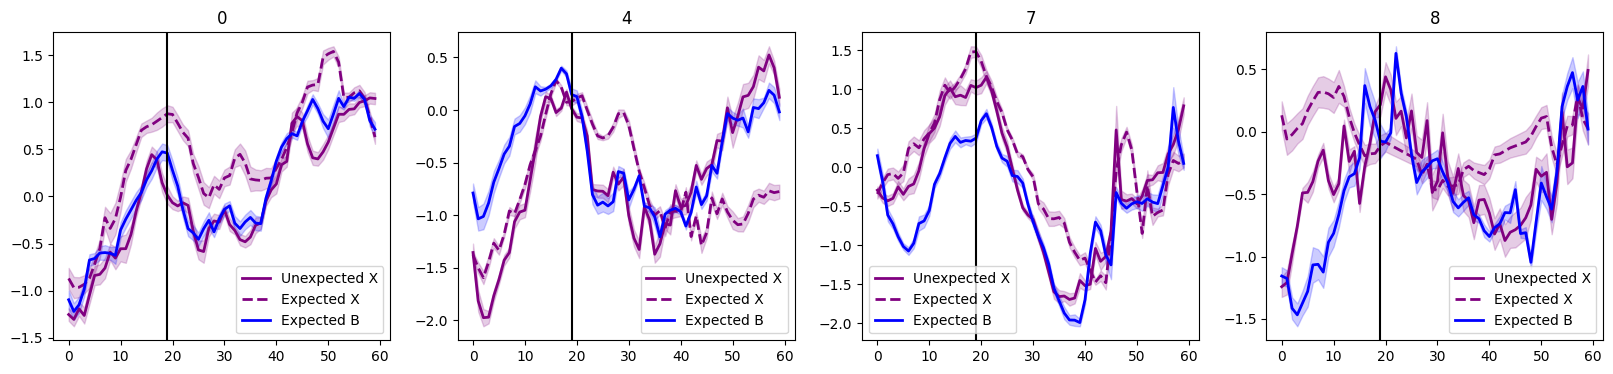

In [44]:
# Pupil Size near reward (Control)
unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(data_ctl[ani]['reward_indices'][trial]) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(data_ctl[ani]['reward_indices'][trial-1])

fig, axes = plt.subplots(1, 4, figsize=(20, 4)) 
axes = axes.flatten()
t_frames = 60
for i, ani in enumerate([0,4,7,8]):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][unexp_rw[ani][:6]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][unexp_rw[ani][6:12]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), data_ctl[ani]['pupil'][exp_rw[ani][:6]], color='blue', alpha=0.2, label= 'Expected B')
    ax.axvline([19], color='black')
    ax.set_title(f'{ani}')
    ax.legend()


Tried to confirm using full data but pupil data is only stored at 7 hz....